# Visualisation of TFBS in Promotor regions

In [1]:
import pybedtools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
tfbs_all_prom = pybedtools.BedTool("/sybig/projects/GeneRegulation/data/jme/Bachelorarbeit/data/Promotor_with_TFBS/prom_with_tfbs_02.bed")
df_prom_all = tfbs_all_prom.to_dataframe(names = ["chrom", "start", 'end', 'name_gene', 'score_gene', 'strand_gene', "geneID", "geneType", "expCount", "expScores", "tfbs", "start_tfbs", "end_tfbs", "strand_tfbs","unibin_cell_lines", "tfbs_count", "tfbs_count_unique"])
df_prom = df_prom_all[(df_prom_all.end - df_prom_all.start  == 200) & (df_prom_all.chrom != "chrM")]

In [166]:
df_prom_protein = df_prom[df_prom.geneType == "protein_coding"]

## Visualisation of remaining Gene Types, such as protein-coding

/tmp/ipykernel_3233908/1911211296.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


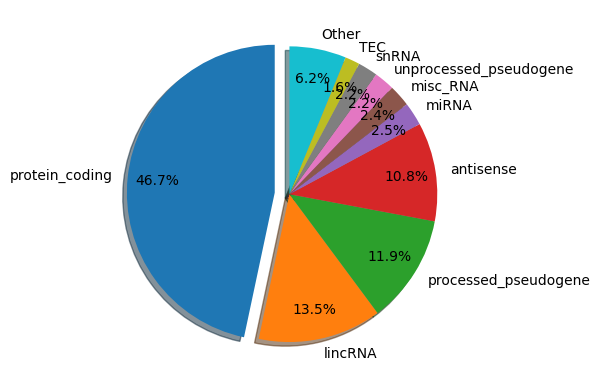

In [167]:
count_genetype = df_prom["geneType"].value_counts()
count_genetype.name = "GENCODE gene biotype"

relevant = count_genetype[:9]
other = count_genetype[10:].sum()
relevant["Other"] = other

fig = plt.figure()
relevant.plot.pie(figsize=(6,6), subplots=True, explode=[0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], shadow = True, startangle= 90, autopct='%1.1f%%',  pctdistance=0.8, labeldistance=1.1)
plt.ylabel("")
fig.savefig("GTEx_genetype_count_pie_02.png")
fig.show()


## Visualisation of TFBS count in most important Gene Types

In [168]:
# TFBS count in GeneType
df_prom_type_tmp = df_prom[df_prom.geneType == "protein_coding"]
tfbs_count = df_prom_type_tmp.tfbs_count.to_numpy()

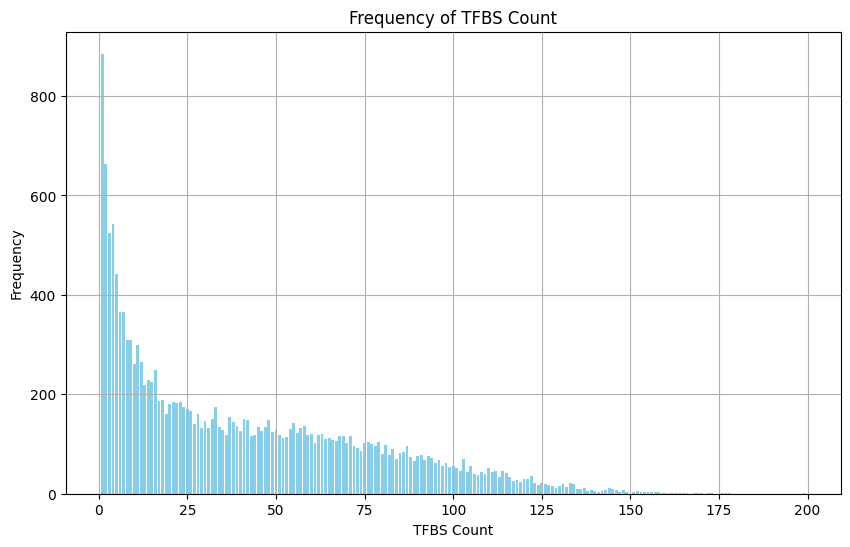

In [169]:

# Calculate unique counts and their frequencies
unique_counts, counts = np.unique(tfbs_count, return_counts=True)

# Plot the frequencies
plt.figure(figsize=(10, 6))
plt.bar(unique_counts, counts, color='skyblue')
plt.title('Frequency of TFBS Count')
plt.xlabel('TFBS Count')
plt.ylabel('Frequency')
plt.grid(True)

# Save the plot
#plt.savefig('tfbs_frequency_plot_protein_coding.png')

# Show the plot
plt.show()

## Expression by tfbs_count

In [170]:
df_sort_tfbs_count = df_prom_protein.sort_values("tfbs_count")

In [171]:
mean_exp_per_sort = np.array([np.array(x.split(",")[:-1], dtype="float64").mean() for x in df_sort_tfbs_count.expScores])
mean_exp_per_sort.max()


5208.007759259259

In [172]:
tfbs_count_sort = np.array((df_sort_tfbs_count.tfbs_count))

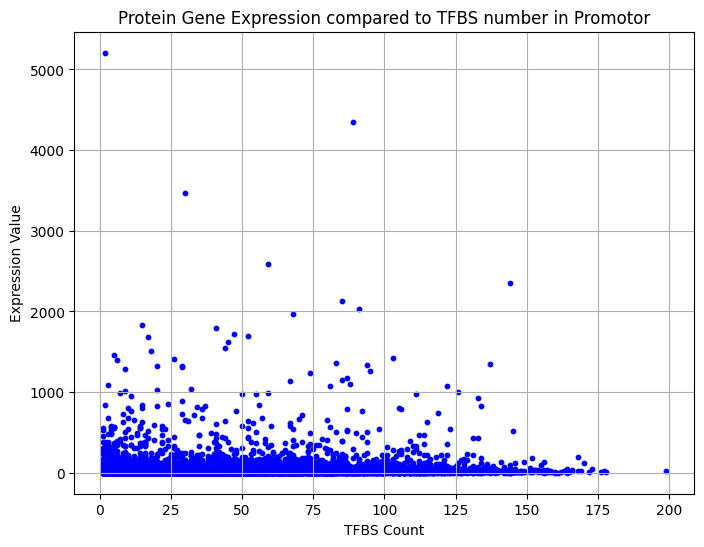

In [179]:
# Plot the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(tfbs_count_sort, mean_exp_per_sort, color='blue', marker='o', s=10)
plt.title('Protein Gene Expression compared to TFBS number in Promotor')
plt.xlabel('TFBS Count')
plt.ylabel('Expression Value')
plt.grid(True)
plt.savefig("Scatter_Gene_exp_by_tfbs_count_protein.png")
plt.show()

### Boxplot

In [182]:
mean_exp_per_sort
tfbs_count_sort

array([  1,   1,   1, ..., 177, 178, 199])

In [191]:
bins = np.arange(0, 225, 25)
binned_data = [[] for _ in range(len(bins)-1)]
for i in range(len(bins)-1):
    binned_data[i] = mean_exp_per_sort[(tfbs_count_sort >= bins[i]) & (tfbs_count_sort < bins[i+1])]

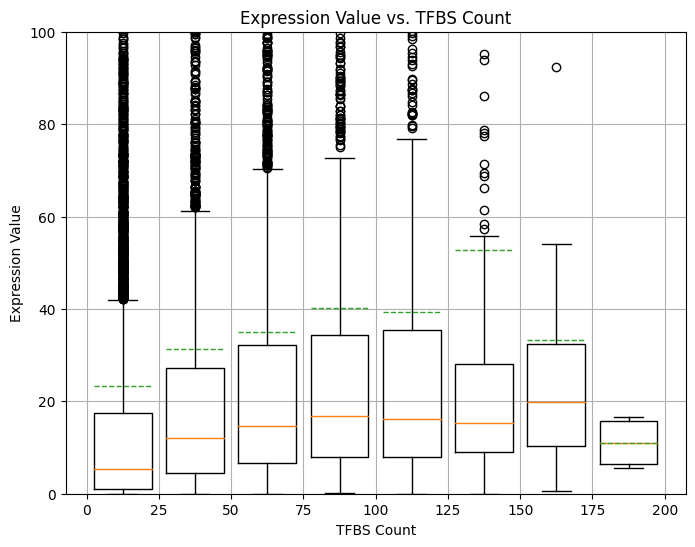

In [227]:
# Plot the box plot for each bin
plt.figure(figsize=(8, 6))
plt.boxplot(binned_data, positions=bins[:-1]+12.5, widths=20, showmeans=True, meanline=True)  # Adjust widths if needed
plt.xticks(bins, bins)
plt.xlim()
plt.ylim(0,100)
plt.title('Expression Value vs. TFBS Count')
plt.xlabel('TFBS Count')
plt.ylabel('Expression Value')
plt.grid(True)
plt.savefig("Boxplot_Gene_exp_by_tfbs_count_protein_ZOOM.png")
plt.show()